# ML Model to Predict Occurrence of Heart Failure


# Data Import and Exploration


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import os
import time


In [2]:
#loading the data

df = pd.read_csv('heart.csv')

In [3]:
# exploring the data

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Feature Information

**Age**: age in years

**Sex**: (1 = male; 0 = female)

**ChestPainType**: chest pain type (0/1/2/3)

**RestingBP**: resting blood pressure (in mm Hg on admission to the hospital)

**Cholesterol**: serum cholestoral in mg/dl

**FastingBS**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**RestingECG**: resting electrocardiographic results

**MaxHR**: maximum heart rate achieved

**ExerciseAngina**: exercise induced angina (1 = yes; 0 = no)

**Oldpeak**: ST depression induced by exercise relative to rest

**ST_Slope**: the slope of the peak exercise ST segment

**HeartDisease**: (0 = did not occur, 1 = occur)

In [6]:
# checking the unique value of each feature
pd.set_option('display.max_rows', None) # in case if there are too many features
df.nunique()


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
# checking missing values

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#checking the datatypes

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
# descriptive statistics of the continuous variables

numeric_var = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numeric_var].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Visualizing the distribution of the target variable

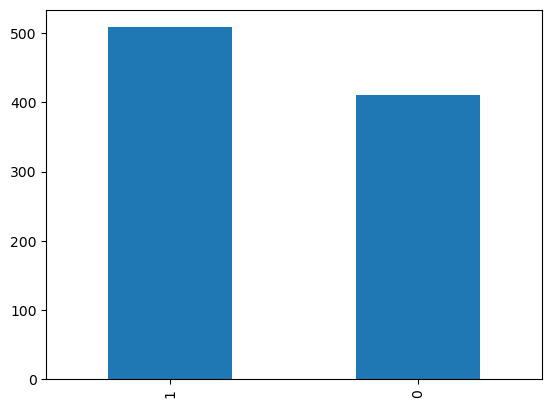

In [11]:
df['HeartDisease'].value_counts().plot(kind='bar')
plt.show()

C:\Users\Gitaka\AppData\Local\Temp\ipykernel_28164\2143949274.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")


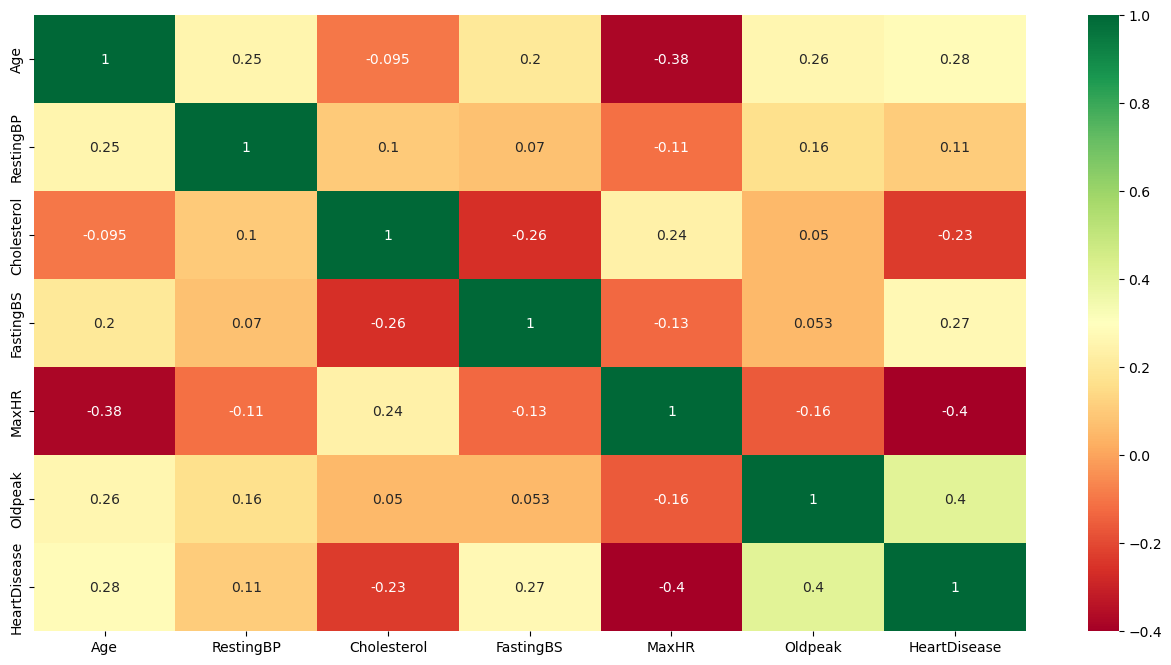

In [12]:
plt.figure(figsize=[16,8])
corr = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [13]:
features = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

### Splitting the data

In [14]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df['HeartDisease']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Data Preprocessing

In [17]:
# for binary variables, ordinal encoder 

from sklearn.preprocessing import OrdinalEncoder
bin_var = ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease', 'RestingECG']
enc_oe = OrdinalEncoder()

for bins in bin_var:
  enc_oe.fit(df[[bins]])
  df[[bins]] = enc_oe.transform(df[[bins]])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,ATA,140,289,0.0,1.0,172,0.0,0.0,Up,0.0
1,49,0.0,NAP,160,180,0.0,1.0,156,0.0,1.0,Flat,1.0
2,37,1.0,ATA,130,283,0.0,2.0,98,0.0,0.0,Up,0.0
3,48,0.0,ASY,138,214,0.0,1.0,108,1.0,1.5,Flat,1.0
4,54,1.0,NAP,150,195,0.0,1.0,122,0.0,0.0,Up,0.0


In [18]:
# for multi-categorical variables, they need one-hot encoding (transform them into dummy vars)

from sklearn.preprocessing import OneHotEncoder

multi_cat = ['ChestPainType', 'ST_Slope']

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

enc_ohe = OneHotEncoder()
enc_ohe.fit(df[multi_cat])

df = OneHotEncoding(df, enc_ohe, multi_cat)

In [19]:
# To see if'ChestPainType', 'ST_Slope' are are assigned as dummy vars

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    float64
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    float64
 5   RestingECG         918 non-null    float64
 6   MaxHR              918 non-null    int64  
 7   ExerciseAngina     918 non-null    float64
 8   Oldpeak            918 non-null    float64
 9   HeartDisease       918 non-null    float64
 10  ChestPainType_ASY  918 non-null    float64
 11  ChestPainType_ATA  918 non-null    float64
 12  ChestPainType_NAP  918 non-null    float64
 13  ChestPainType_TA   918 non-null    float64
 14  ST_Slope_Down      918 non-null    float64
 15  ST_Slope_Flat      918 non-null    float64
 16  ST_Slope_Up        918 non

In [20]:
# standarizing continuous data

from sklearn.preprocessing import StandardScaler
numeric_var
scaler = StandardScaler()
scaler.fit(df[numeric_var])

df[numeric_var] = scaler.transform(df[numeric_var])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1.0,0.410909,0.825070,0.0,1.0,1.382928,0.0,-0.832432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.478484,0.0,1.491752,-0.171961,0.0,1.0,0.754157,0.0,0.105664,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,1.0,-0.129513,0.770188,0.0,2.0,-1.525138,0.0,-0.832432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.584556,0.0,0.302825,0.139040,0.0,1.0,-1.132156,1.0,0.574711,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.051881,1.0,0.951331,-0.034755,0.0,1.0,-0.581981,0.0,-0.832432,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
from sklearn import model_selection

y = df['HeartDisease']
X = df.drop('HeartDisease', axis = 1)

#splitting the train and test 80/20 respectively
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state = 1) 
#stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')


training data has 734 observation with 16 features
test data has 184 observation with 16 features


In [22]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)

# Model Training & Evaluation

In [23]:
#Building KNN 

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# for confusion matrix
from sklearn import metrics, model_selection 

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

In [24]:
classifier_KNN.fit(X_train, y_train) # train model
y_predict = classifier_KNN.predict(X_test) # predict results

C:\Users\Gitaka\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Gitaka\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [25]:
y_predict

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.])

In [26]:
y_predict.shape

(184,)

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
print("Confusion matrix : \n\n" , confusion_matrix(y_predict,y_test))

Confusion matrix : 

 [[66 13]
 [16 89]]


In [29]:
print("Classification Report : \n\n" , classification_report(y_predict, y_test), "\n")

Classification Report : 

               precision    recall  f1-score   support

         0.0       0.80      0.84      0.82        79
         1.0       0.87      0.85      0.86       105

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184
 



In [42]:
def make_prediction_knn_preprocessed(model, input_data, enc_oe, enc_ohe, scaler):
    import pandas as pd
    
    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data])

    # Define the columns used during training
    training_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

    # Transform categorical columns using OrdinalEncoder
    binary_var = ['Sex', 'FastingBS', 'ExerciseAngina', 'RestingECG']
    
    enc_oe.fit(input_df[['Sex', 'FastingBS', 'ExerciseAngina', 'RestingECG']])
    
    input_df[binary_var] = enc_oe.transform(input_df[binary_var])

    # Transform 'ChestPainType' and 'ST_Slope' using OneHotEncoder
    multi_categ = ['ChestPainType', 'ST_Slope']
    transformed = pd.DataFrame(enc_ohe.transform(input_df[multi_categ]).toarray(), columns=enc_ohe.get_feature_names_out(multi_categ))
    input_df = pd.concat([input_df, transformed], axis=1).drop(multi_categ, axis=1)

    # Define the numeric variables
    numeric_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

    # Scale the numeric variables
    input_df[numeric_vars] = scaler.transform(input_df[numeric_vars])

    # Make a prediction using the preprocessed input data and the KNN classifier
    prediction = model.predict(input_df)

    return prediction


# Example input data for prediction
input_data = {
    'Age': 49,
    'Sex': 'F',
    'ChestPainType': 'NAP',
    'RestingBP': 160,
    'Cholesterol': 280,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 156,
    'ExerciseAngina': 'N',
    'Oldpeak': 1.0,
    'ST_Slope': 'Flat'
}

# Example usage
predicted_heart_disease_knn_preprocessed = make_prediction_knn_preprocessed(classifier_KNN, input_data, enc_oe, enc_ohe, scaler)
print(predicted_heart_disease_knn_preprocessed)


[1.]


In [40]:
import pickle

In [41]:
pickle.dump(classifier_KNN, open('heartfailuremodel.pkl', 'wb'))